# Confidence interval

In determining the range of rejection for the $z$-test, we assume a true (but unknown) value $\mu_0$ and a known standard deviation. Then we determine the quartile $q_{0.025}$ and $q_{0.975}$ with a two-sided test and significance level $\alpha=0.05$. 

We assume a normal distribution curve $X\sim\mathcal{N}(5,2^2)$. Then the $q_{0.025}$ and $q_{0.975}$ quantiles are 

In [1]:
qnorm(p = c(0.025, 0.975), mean = 5, sd = 2)

[1] 1.080072 8.919928

Below, the normal distribution curve with the rejection range is drawn in red.

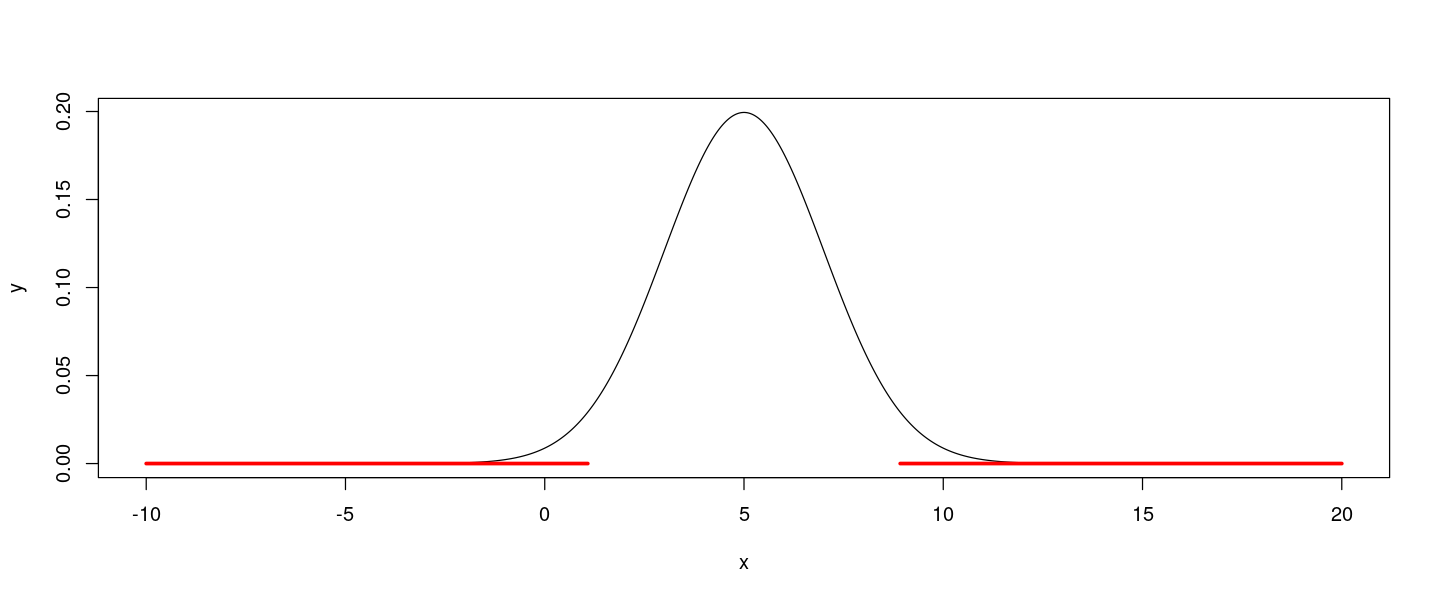

In [4]:
# For better display of graphic
library(latex2exp)
library(repr)
options(repr.plot.width=12, repr.plot.height=5)

# Define range, y-values of the plot and plot
x <- seq(from = -10, to = 20, by = .01)
y <- dnorm(x, mean = 5, sd = 2)

plot(x, y, type = "l")

# Determine the 0.025- and 0.975-quantiles
q <- qnorm(p = c(0.025, 0.975), mean = 5, sd = 2)

# Draw rejection range
# lines() adds to an existing graphic, the normal curve above, additional lines
# The first entry c(-10, q[1]) defines the x-coordinates
# The second entry c(0, 0) defines the corresponding y-coordinates
lines(c(-10, q[1]), c(0, 0), col = "red", lwd = 3)
lines(c(q[2], 20), c(0, 0), col = "red", lwd = 3)

If $\overline{x}_n$ lies in the rejection area (red area), then the null hypothesis $H_0$ is rejected. 


Now the true $\mu$ is practically always unknown and for the determination of the rejection area a value was simply assumed. We can also simply reverse the question: We know $\overline{x}_n$ and ask ourselves for which $\mu$ is $H_0$ _not_ discarded.

This can be derived mathematically, but we do it graphically here. We again assume $\mu=5$ for illustration.

We have now given $\overline{x}_n=6$ and draw the discard area. In the sketch below are:

- The red lines correspond to the rejection range for $\mu_0=5$.
- The vertical black line corresponds to $\overline{x}_n=6$.
- The vertical blue line corresponds to $\mu_0=5$

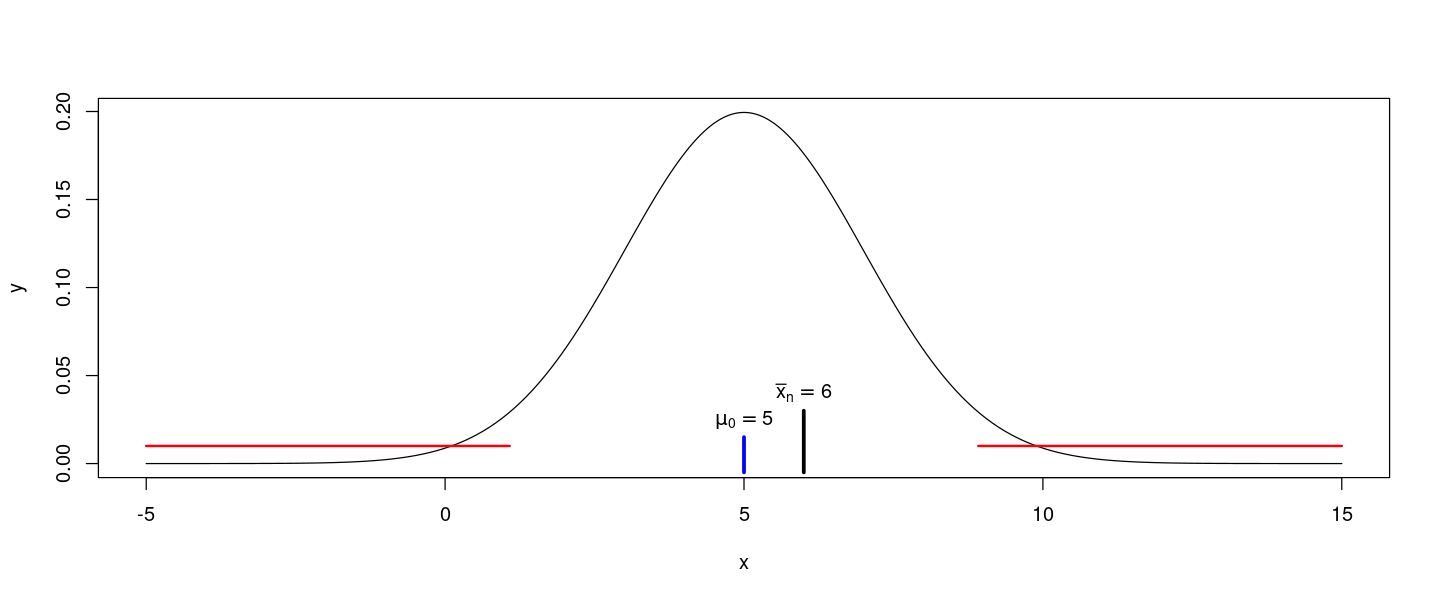

In [5]:
mean = 5 

x_u <- -5
x_o <- 15

x <- seq(from = x_u, to = x_o, by = .01)
y <- dnorm(x, mean = mean, sd = 2)

plot(x, y, type = "l")

q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)



lines(c(6, 6), c(-.005, 0.03), lwd = 3)

# Blue line for null hypothesis
lines(c(mean, mean), c(-.005, 0.015), col = "blue", lwd = 3)

# Rejection range of null hypothesis
q_n <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)
lines(c(x_u, q_n[1]), c(0.01, 0.01), col = "red", lwd = 2)
lines(c(q_n[2], x_o), c(0.01, 0.01), col = "red", lwd = 2)
text(6, .04, TeX("$\\bar{x}_n=6$"))
text(mean, .025,TeX(sprintf(("$\\mu_0=%g$"),mean)))
#text(6 ,.04, "x_bar=6")
#text(mean, .02, paste0("mu_0=",mean))

We find that both values $\overline{x}$ is not within the rejection ranges. The idea now is that we increase $\mu_0$ and leave $\overline{x}_n=6$ constant. To do this, we define the following function ci(), where $\mu_0$ is passed in each case:

In [32]:
ci <- function(mean){
    y <- dnorm(x, mean = mean, sd = 2)
    plot(x, y, type = "l")
    q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)
    lines(c(6, 6), c(-.005, 0.03), lwd = 3)
    lines(c(mean, mean), c(-.005, 0.01), col = "blue", lwd = 3)
    q_n <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)
    lines(c(x_u, q_n[1]), c(0.01, 0.01), col = "red", lwd = 2)
    lines(c(q_n[2], x_o), c(0.01, 0.01), col = "red", lwd = 2)
    text(6, .04, TeX("$\\bar{x}_n=6$"))
    text(mean, .025,TeX(sprintf(("$\\mu_0=%g$"),mean)))
}

The idea for the confidence interval is that we determine all null hypothesis valus for which $\overline{x}_n=6$ ist _not_ rejected. 

We choose $\mu_0=7$, then $\mu_0=8$ and $\mu_0=10.5$.

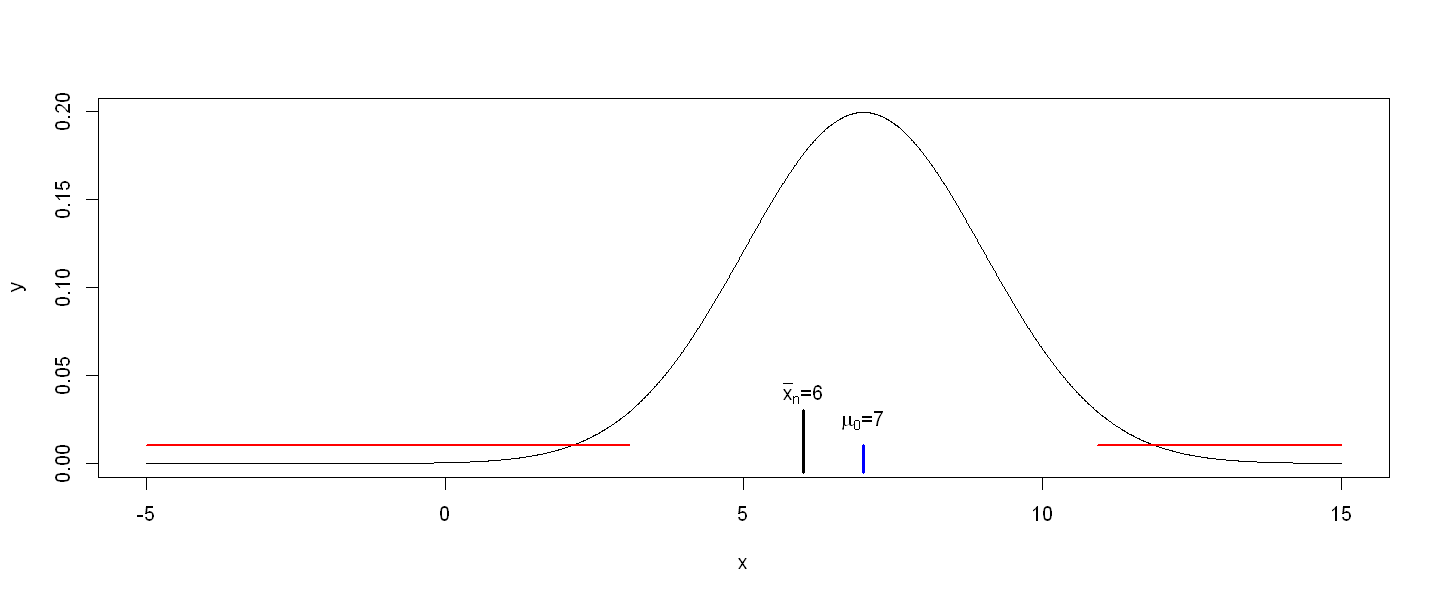

In [33]:
ci(7)

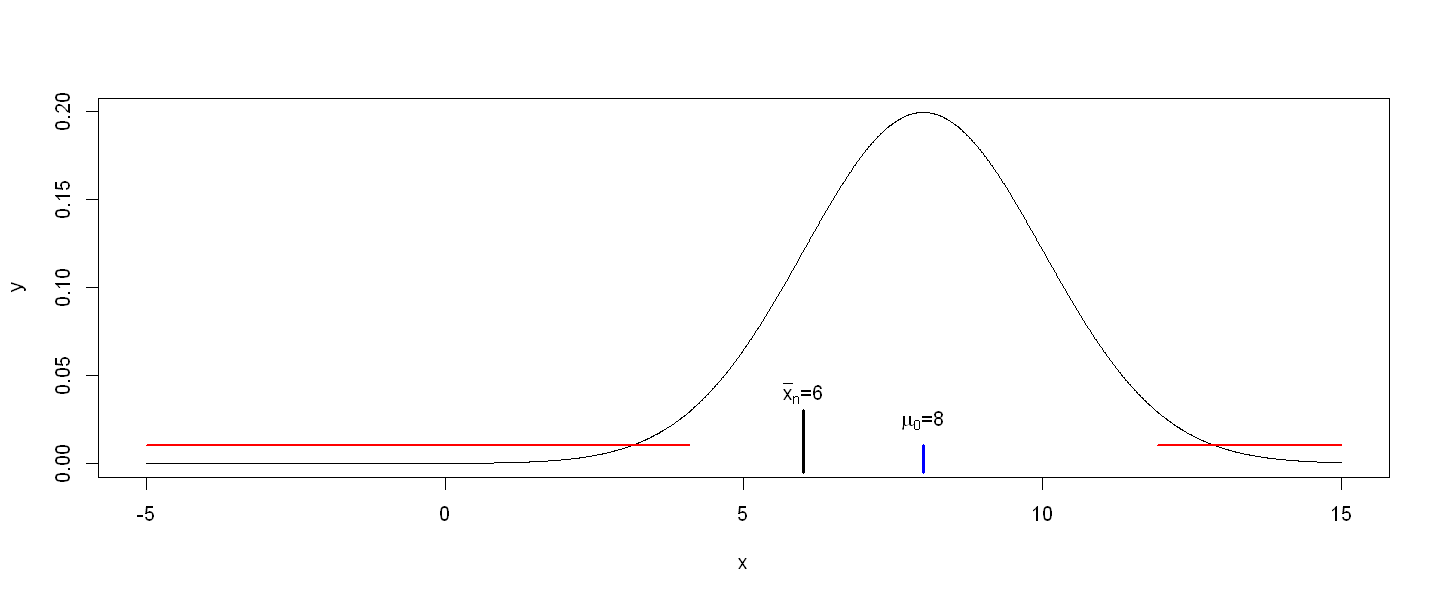

In [22]:
ci(8)

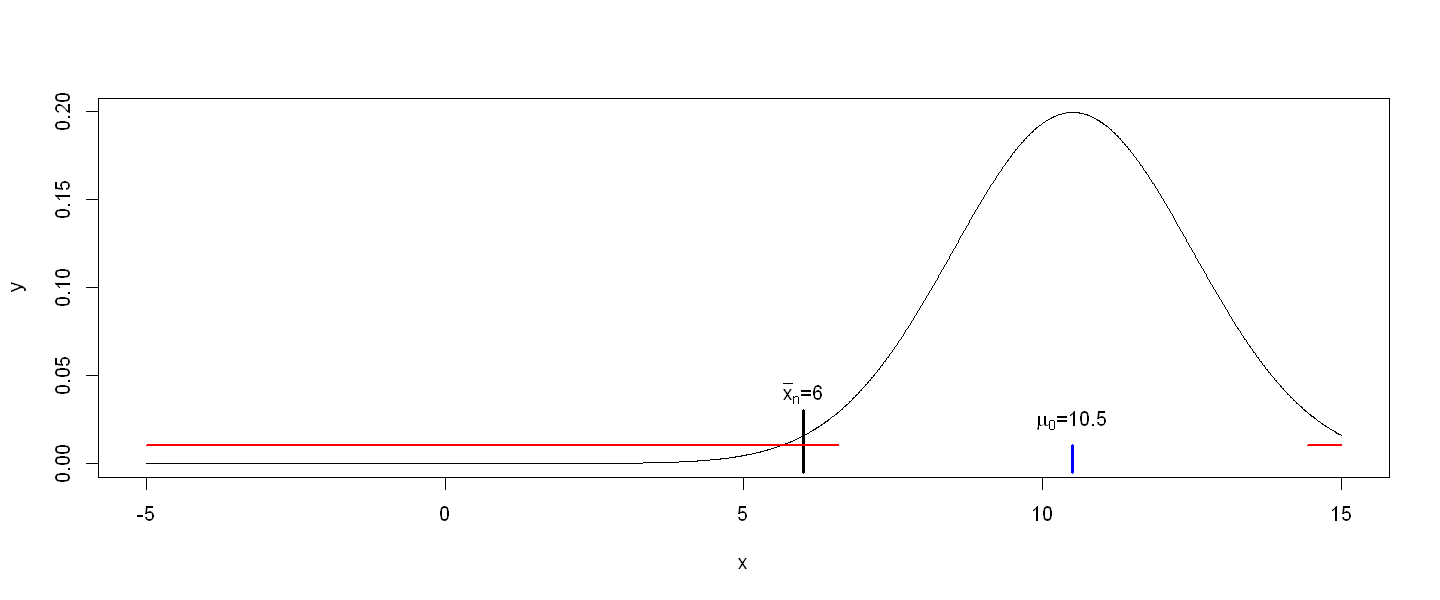

In [34]:
ci(10.5)

For $\mu_0=7$, $\mu_0=8$   the situation is similar:  In both cases, $\overline{x}_n=6$ is  not within the rejection range, so $H_0$ is _not_ rejected for $\overline{x}_n=6$.

The situation changes for $\mu_0=10.5$, where this value $\overline{x}_n=6$ (black line) lies within the rejection range of $\mu_0=10.5$ (red lines), so the null hypothesis $H_0$ is now rejected.  

Let us illustrate this in another way. We do not take the rejection range, but what _does not_ belong to the rejection range. This is drawn in green below. 

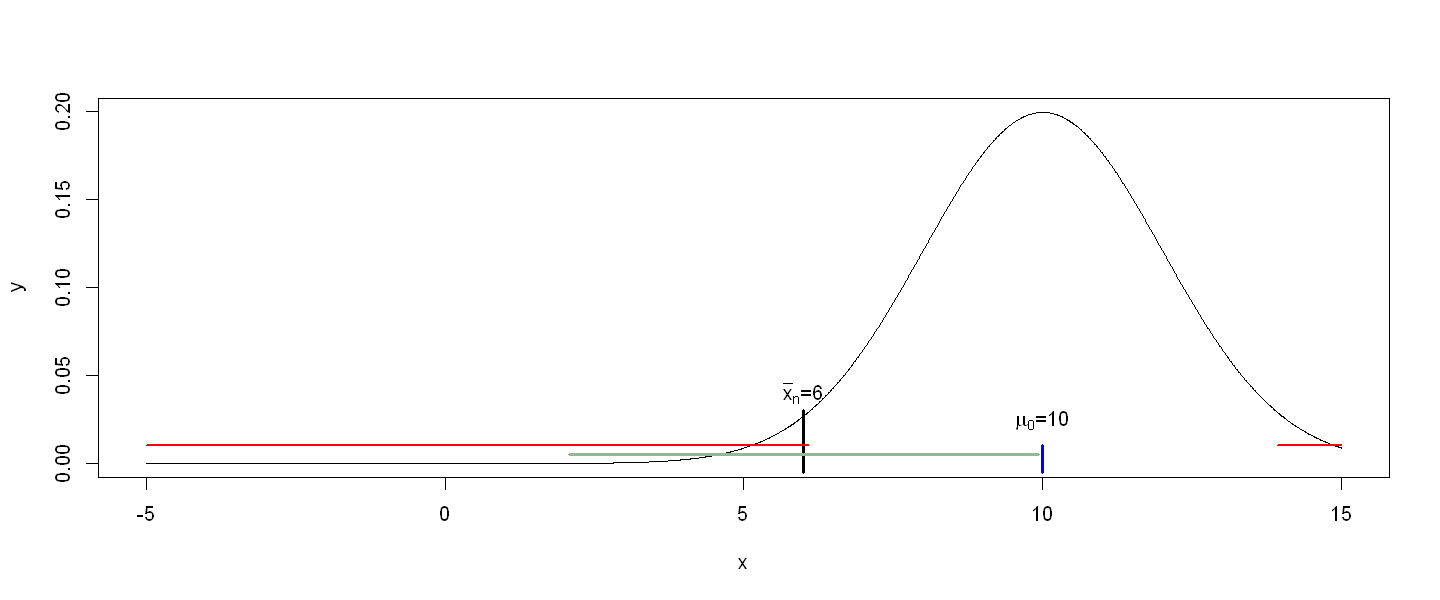

In [35]:
mean = 10
y <- dnorm(x, mean = mean, sd = 2)
plot(x, y, type = "l")
q <- qnorm(p = c(0.025, 0.975), mean = 6, sd = 2)
lines(c(6, 6), c(-.005, 0.03), lwd = 3)

lines(c(mean, mean), c(-.005, 0.01), col = "blue", lwd = 3)
q_n <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)
lines(c(q[1], q[2]), c(.005, .005), col = "darkseagreen", lwd = 3)
lines(c(x_u, q_n[1]), c(0.01, 0.01), col = "red", lwd = 2)
lines(c(q_n[2], x_o), c(0.01, 0.01), col = "red", lwd = 2)
text(6, .04, TeX("$\\bar{x}_n=6$"))
text(mean, .025,TeX(sprintf(("$\\mu_0=%g$"),mean)))

For example, the value 0 is not in the confidence interval:

In [46]:
qnorm(p = c(0.025, 0.975), mean = 6, sd = 2)

[1] 2.080072 9.919928

We have seen above that the null hypothesis is then rejected. So if the true $\mu_0$ falls outside the confidence interval, then the null hypothesis is rejected. 

This leads us to another interpretation of the confidence interval. It contains all $\mu_0$'s for which the null hypothesis is _not_ rejected. So it tells us in which interval the true $\mu_0$ is located. And as always, this does not hold absolutely, but with a certain probability. In this case, 95% of the true $\mu_0$ lies in the confidence interval. We therefore also speak of a 95% confidence interval. 

Thus we have another possibility for a test decision:
- If $\mu_0$ of the null hypothesis lies in the confidence interval, the null hypothesis is _not_ rejected. 
- If $\mu_0$ of the null hypothesis is _not_ in the confidence interval, the null hypothesis is rejected.

Here the function ci_2():

In [36]:
ci_2 <- function(mean)
{
    y <- dnorm(x, mean = mean, sd = 2)
    plot(x, y, type = "l")
    q <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)
    lines(c(6, 6), c(-.005, 0.03), lwd = 3)
    lines(c(q[1], q[2]), c(0, 0), col = "darkseagreen", lwd = 3)
    lines(c(mean, mean), c(-.005, 0.01), col = "blue", lwd = 3) 
    q_n <- qnorm(p = c(0.025, 0.975), mean = mean, sd = 2)
    lines(c(x_u, q_n[1]), c(0.01, 0.01), col = "red", lwd = 2)
    lines(c(q_n[2], x_o), c(0.01, 0.01), col = "red", lwd = 2)
text(6, .04, TeX("$\\bar{x}_n=6$"))
text(mean, .025,TeX(sprintf(("$\\mu_0=%g$"),mean)))
}

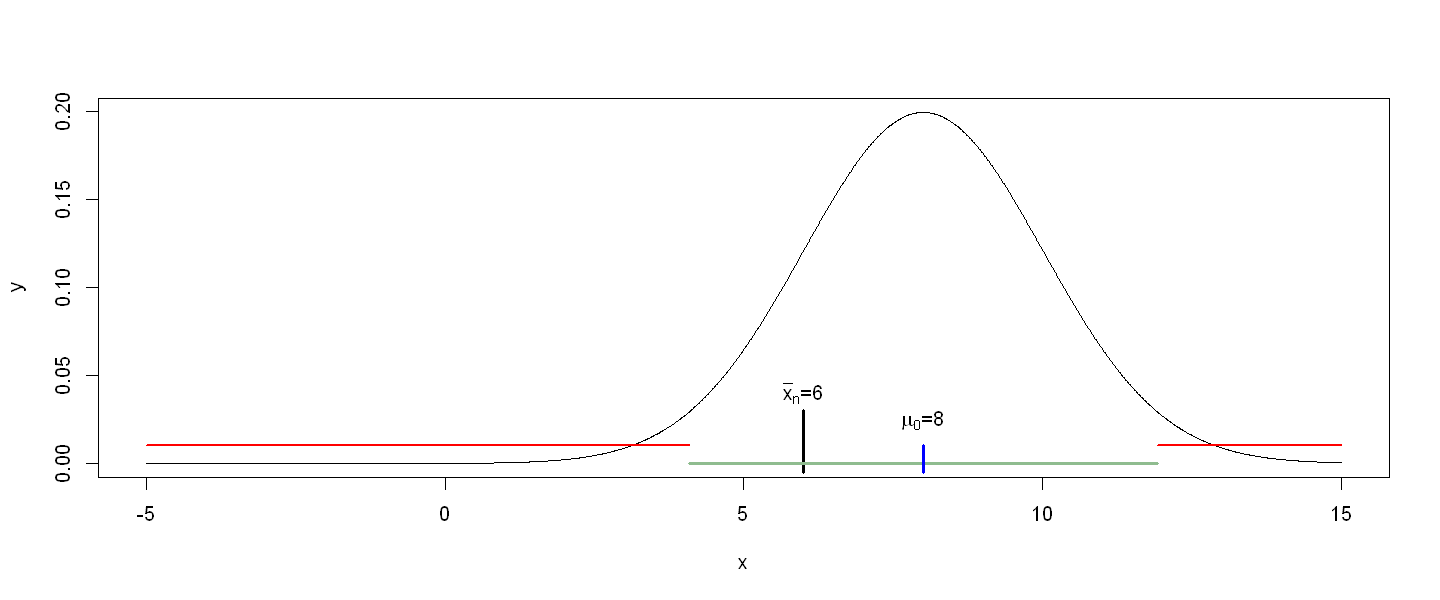

In [37]:
ci_2(8)

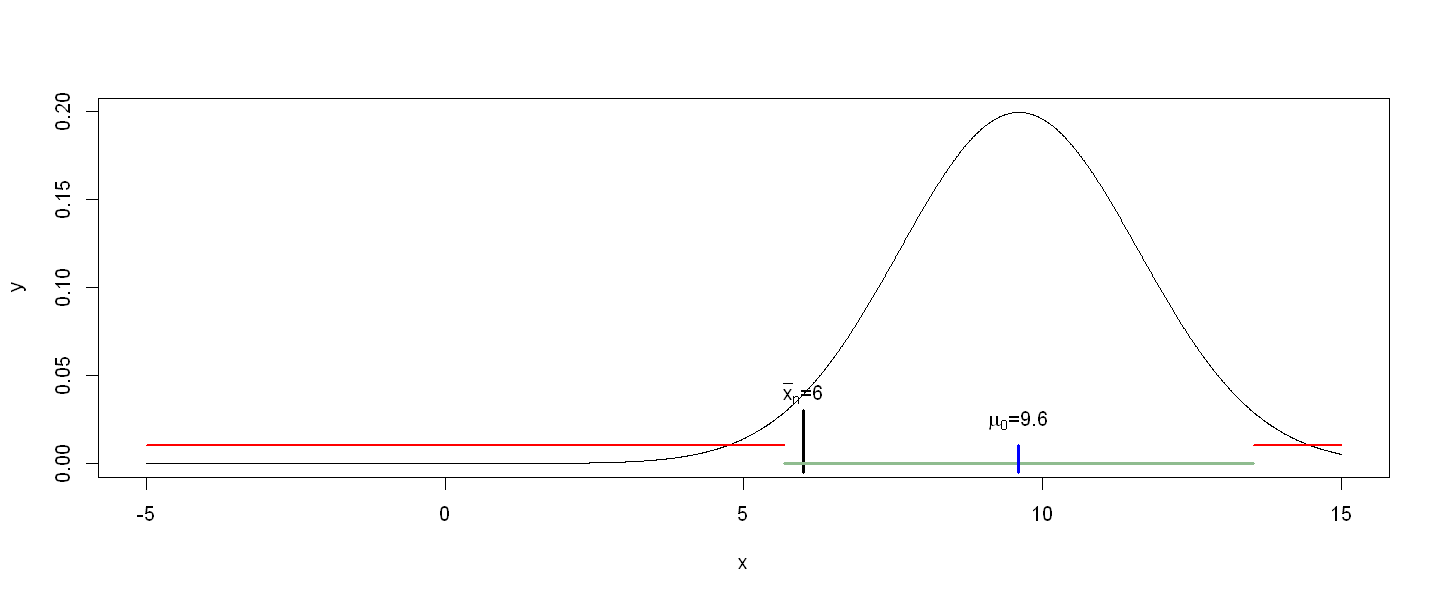

In [38]:
ci_2(9.6)

## Simulation

We now randomly select a value from $\mathcal{N}(5, 2^2)$ and see if this value lies in the confidence interval. We consider this randomly selected value as $\overline{x}_n$ and determine its confidence interval:

In [51]:
set.seed(1)
m <- rnorm(n = 1, mean = 5, sd = 2)
m

[1] 3.747092

In [52]:
q <- qnorm(p = c(0.025, 0.975), mean = m, sd = 2)

cat("Confidence interval: \n", q)

Confidence interval: 
 -0.1728356 7.66702

The value lies within the confidence interval. But is this always the case?

In [12]:
set.seed(7)
m <- rnorm(n = 1, mean = 5, sd = 2)
print(m)
q <- qnorm(p = c(0.025, 0.975), mean = m, sd = 2)
 
cat("Coonfidence interval: \n", q)

[1] 9.574494
Vertrauensintervall 
 5.654566 13.49442

In this case, 5 is not in the confidence interval. The question is how many times this is the case. To do this, we simulate 1000 random values from $\mathcal{N}(5, 2^2)$ and calculate their confidence interval and see whether this value lies in the confidence interval or not. 

In [72]:
n <- 1000

r <- rnorm(n = n, mean = 5, sd = 2)
q_u <- qnorm(p = c(0.025), mean = r, sd = 2)
q_o <- qnorm(p = c(0.975), mean = r, sd = 2)

k <- 0

for (i in 1:n){
    if ((q_u[i]<= 5 & 5 <= q_o[i]) == FALSE){
        k <- k+1
    }
}

print(k)

[1] 51


Each time we execute the code, the code returns a different number, but all are about 50 or 5% of 1000. We can return 100 trials at the same time: 

In [74]:
ci_3 <- function(n){
  r <- rnorm(n = n, mean = 5, sd = 2)
  q_u <- qnorm(p = c(0.025), mean = r, sd = 2)
  q_o <- qnorm(p = c(0.975), mean = r, sd = 2)

  k <- 0

  for (i in 1:n){
    if ((q_u[i]<= 5 & 5 <= q_o[i]) == FALSE){
        k <- k+1
    }
}
cat(k," ")  
}

for (i in 1:100){
    ci_3(1000)
}

55  43  54  47  50  51  57  57  60  61  50  56  57  47  46  35  53  54  57  52  45  53  46  74  59  65  59  37  57  54  51  51  54  51  57  48  42  55  41  51  60  51  43  53  56  46  41  41  51  49  59  50  44  61  51  49  59  52  42  53  51  47  51  55  43  58  44  43  61  55  53  50  58  43  69  49  46  47  59  59  46  48  55  45  41  61  42  48  47  66  53  47  53  46  40  45  46  47  51  54  

We can still do this graphically, but only 100 selected values and their associated confidence intervals. All black intervals _do_ not contain the value 5.

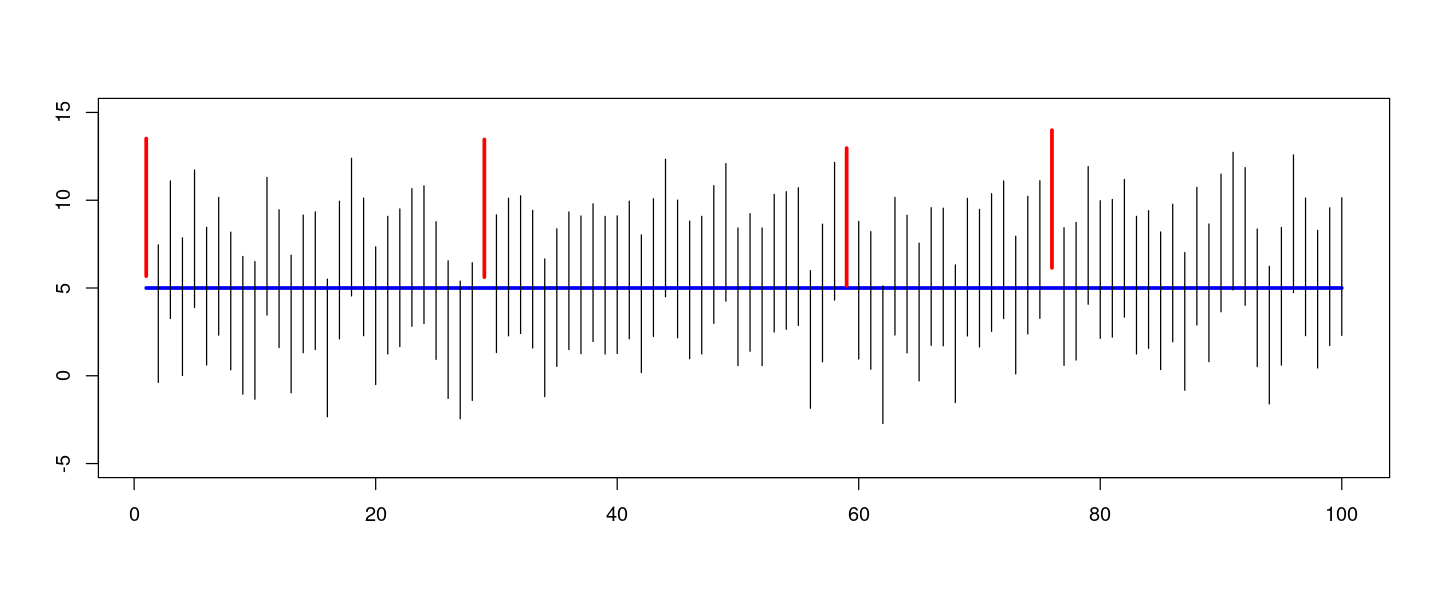

In [78]:
r <- rnorm(n = 100, mean = 5, sd = 2)
q_u <- qnorm(p = c(0.025), mean = r, sd = 2)
q_o <- qnorm(p = c(0.975), mean = r, sd = 2)

plot(NULL, xlim = c(1, 100), ylim = c(-5, 15), xlab = "", ylab = "")

lines(c(1, 100), c(5, 5), lwd = 3, col = "blue")
for (i in 1:100){
    lines(c(i, i), c(q_u[i], q_o[i]))
    if ((q_u[i]<= 5 & 5 <= q_o[i]) == FALSE){
       lines(c(i, i), c(q_u[i], q_o[i]), col = "red", lwd = 3) 
    }
    
}

Again, the number of black lines changes with each pass (because of randomness), but it is always around 5, so 5% of 100.